## Image Histogram

2D bar plot of the number of pixels for each tonal value (tonal distribution). The horizontal axis represents the pixel intensities (0-255). The vertical axis denotes the frequency of each intensity.

It helps in understanding the contrast, brightness, and intensity distribution of the image.


*cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])*

**images :** it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

**channels :** it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

**mask :** mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

**histSize :** this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

**ranges :** this is our RANGE. Normally, it is [0,256].


In [65]:
import cv2
import matplotlib.pyplot as plt

In [66]:
def show_img(title, image):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def plot_hist(title, hist):
    plt.plot(hist)
    plt.title(title)
    plt.xlabel("Pixel Intensity (0–255)")
    plt.ylabel("Frequency")
    plt.show()

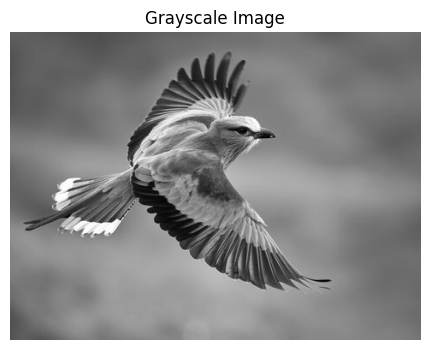

(360, 480)


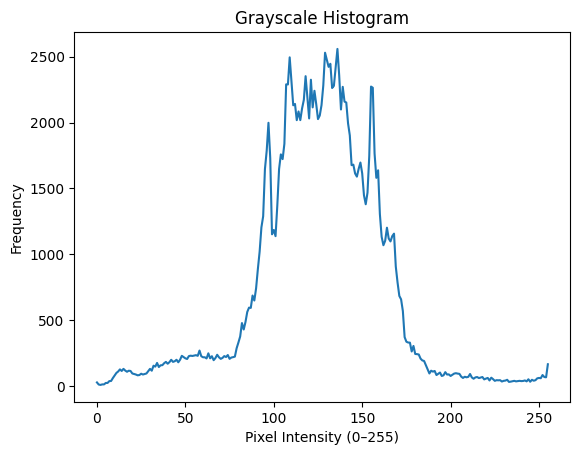

In [67]:
img = cv2.imread('./images/bird.jpg',cv2.IMREAD_GRAYSCALE)
show_img('Grayscale Image', img)
print(img.shape)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plot_hist('Grayscale Histogram', hist)

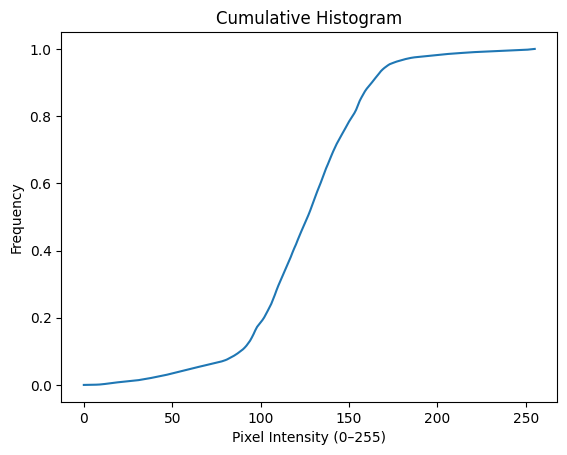

In [68]:
# Cumulative Histogram
cum_hist = hist.cumsum()
cum_hist_normalized = cum_hist / cum_hist[-1]
plot_hist('Cumulative Histogram', cum_hist_normalized)

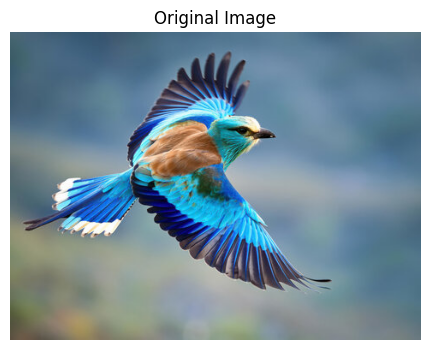

(360, 480)


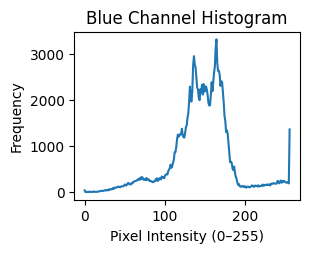

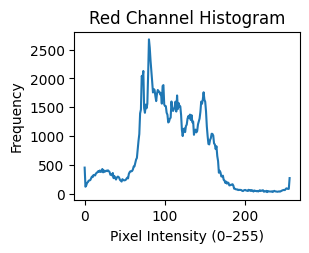

In [69]:
img_color = cv2.imread('./images/bird.jpg')
show_img('Original Image', img_color)
print(img.shape)
hist_blue = cv2.calcHist([img_color],[0],None,[256],[0,256])
plt.subplot(221)
plot_hist('Blue Channel Histogram', hist_blue)
hist_red = cv2.calcHist([img_color],[2],None,[256],[0,256])
plt.subplot(222)
plot_hist('Red Channel Histogram', hist_red)


### Histogram Equalization

Histogram Equalization redistributes the pixel intensities so that they cover the full range (0–255) more evenly.

Result → the image appears with higher contrast (brighter whites, darker blacks, more details visible)


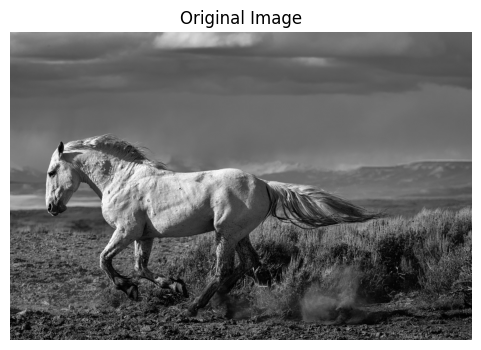

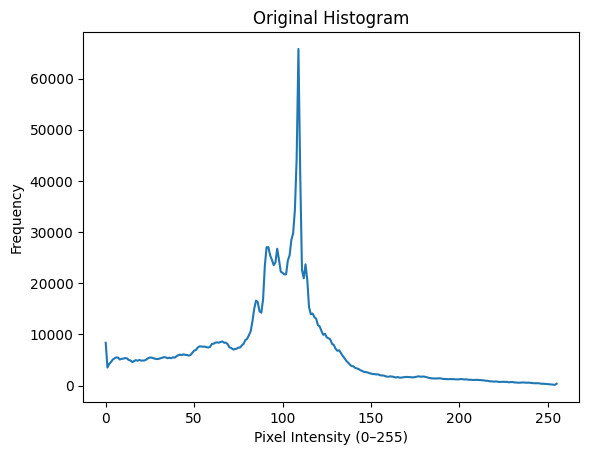

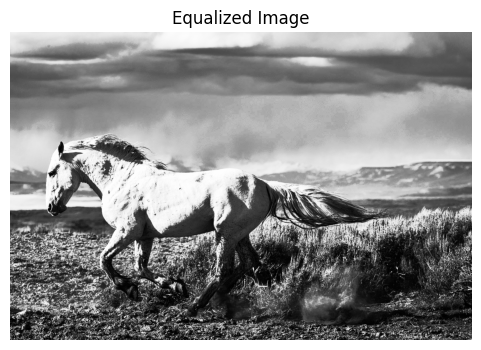

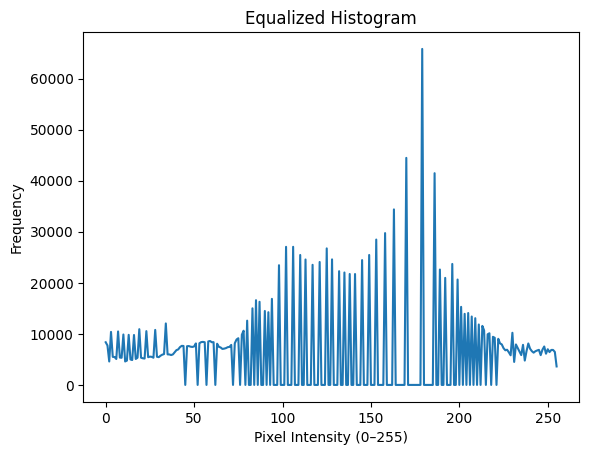

In [73]:
img_equalize = cv2.imread('./images/equalizer.jpg',cv2.IMREAD_GRAYSCALE)
show_img('Original Image', img_equalize)
hist = cv2.calcHist([img_equalize],[0],None,[256],[0,256])
plot_hist('Original Histogram', hist)
equ = cv2.equalizeHist(img_equalize)
show_img('Equalized Image', equ)
hist = cv2.calcHist([equ],[0],None,[256],[0,256])
plot_hist('Equalized Histogram', hist)

#### CLAHE (Contrast Limited Adaptive Histogram Equalization)

Normal Histogram Equalization (HE) : 

- Works on the whole image at once.

- Can cause over-amplification of noise in uniform areas (like the sky or skin).

- Makes very bright or very dark regions look unnatural.

Adaptive Histogram Equalization (AHE) :

- Divides the image into small regions (called tiles).

- Applies histogram equalization separately in each tile.

- Improves local contrast, but often over-amplifies noise in flat regions.

CLAHE :

- Improves on AHE by introducing a clip limit.

- Prevents any histogram bin from getting too large and avoids extreme contrast and noise amplification.

- Then it blends neighboring tiles smoothly.

CLAHE is useful in Medical imaging by enhancing visibility of structures.


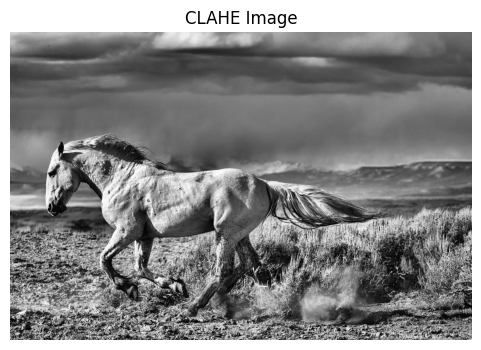

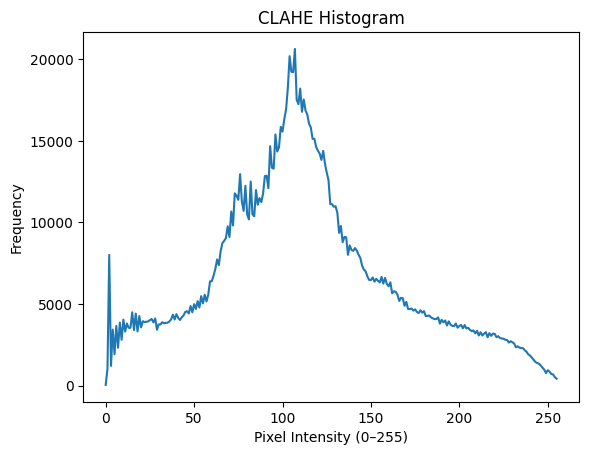

In [74]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img_equalize)
show_img('CLAHE Image', cl1)
hist = cv2.calcHist([cl1],[0],None,[256],[0,256])
plot_hist('CLAHE Histogram', hist)
